# <font color='black'>Projeto:</font> <font color='blue'>Prevendo o Nível de Satisfação dos Clientes do Santander.</font>

## <font color='black'>Data:</font> <font color='blue'>julho, 2020</font>

## <font color='black'>Cientista de Dados:</font> <font color='blue'>Walter Trevisan</font>

## 03- Explore The Data (`Step 02`)

Nesta etapa, vamos continuar a nossa **`Análise Exploratória`** dos dados, utilizando o dataset de treinamento que foi preparado na etapa anterior (**`02-Get-The-Data`**), ou seja, o *data frame* que foi salvo no arquivo **`santander_train.pickle`**.

Então, vamos realizar as seguintes atividades:

1. Carregar o *data frame* de treinamento, salvo no arquivo **`santander_train.pickle`**;


2. Restaurar as informações (objetos) importantes criados e/ou alterados na **`Step 01`** da nossa análise exploratória;


3. Estudar cada atributo/feature e suas características (entender as informações e os tipos de dados), verificando também possíveis valores ausentes (**`Missing Values = NaN`**) e possíveis **`Outliers`**;


4. Salvar informações (objetos) importantes criados e/ou alterados durante a nossa análise exploratória (**`Step 02`**).

## Setup

In [1]:
# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor.
# Então, vamos desativar essas mensagens.
import sys # O pacote "sys" permite manipulações com o sistema operacional:
import os  # Operation System (Packages and Functions)
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Common imports:
import numpy as np    # NumPy
import pandas as pd   # Pandas
import pickle # Para salvar/carregar objetos.

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
# Importa o pacote "seaborn"
import seaborn as sns

# Definindo o diretório raiz (Root) onde serão armazenados todas as informações
# (Imagens, Objetos, Dados, Modelos de ML, etc...) do projeto.
# Diretório Raiz (Root) do Projeto:
PROJECT_ROOT_DIR = "."

# Path: onde serão armazenadas as "Imagens" (Figuras e Gráficos) desta Fase do Projeto:
PROJECT_IMG_PATH = os.path.join(PROJECT_ROOT_DIR, "Images", "03-Explore_The_Data")
# Criando o diretório, se ele não existir:
os.makedirs(PROJECT_IMG_PATH, exist_ok=True)

# Path: onde ficarão armazenados os "Objetos" (Estrututras de Dados) relacionados ao Projeto:
PROJECT_OBJ_PATH = os.path.join(PROJECT_ROOT_DIR, "Objects")
# Criando o diretório, se ele não existir:
os.makedirs(PROJECT_OBJ_PATH, exist_ok=True)

# Path: onde ficarão armazenados os "datasets" (arquivos "csv") e os "Objetos" (Data Frames) do Projeto:
PROJECT_DATA_PATH = os.path.join(PROJECT_ROOT_DIR, "Data")
# Criando o diretório, se ele não existir:
os.makedirs(PROJECT_DATA_PATH, exist_ok=True)

# Path: onde estão armazenadas as classes e funções que serão utilizadas neste notebook:
PROJECT_LIB_PATH = os.path.join(PROJECT_ROOT_DIR, "Library")

# Adicionando o diretório ao 'path' do Sistema, para podermos importar classes e funções que serão
# utilizadas neste notebook:
sys.path.append(PROJECT_LIB_PATH)

# Importando para este notebook, as classes e funções definidas no módulo "DataScience_Library_v1_0":
import DataScience_Library_v1_0 as dslib

# Importando para este notebook, as classes e funções definidas no módulo "DataScience_Plot_Library_v1_0":
import DataScience_Plot_Library_v1_0 as ptlib

# Importando para este notebook, as classes e funções definidas no módulo "DSA_Project_03_Library":
import DSA_Project_03_Library as pjlib

print("Setup Complete!")

Setup Complete!


In [2]:
# Versões dos pacotes usados neste jupyter notebook:
%reload_ext watermark
%watermark -a "Walter Trevisan" --iversions

numpy      1.18.2
pandas     0.25.3
seaborn    0.10.0
matplotlib 3.2.1
Walter Trevisan


## 01- Carregando o nosso *data frame* de treinamento: `santander_train.pickle`

In [3]:
# Carregando o objeto (data frame) "santander_train":
train_df = dslib.pickle_object_load(path=PROJECT_DATA_PATH, file="santander_train.pickle",
                                    msg="The 'santander_train' (data frame) has been successfully uploaded!")

The 'santander_train' (data frame) has been successfully uploaded!


In [4]:
# Renomeando o label "ind_var10cte_ult1", em nosso dataset, para colocá-lo no mesmo padrão das outras variáveis (features).
train_df.rename(columns={'ind_var10cte_ult1': 'ind_var10_cte_ult1'}, inplace=True)

## 02 - Restaurando informações (`objetos`) importantes que serão utilizados nesta etapa:

Primeiro, vamos restaurar/carregar os seguintes `objetos` importantes que serão utilizados nesta etapa da `Análise Exploratória`:

1. **`feat_groupby_vars`:** dicionário com as features agrupadas por tipo de variável (var1, var2, var18, etc...);

2. **`vars_groupby_featcount`:** dicionário com as variáveis (var1, var2, var18, etc...) agrupadas por quantidade (contagem) de features (Feat_1, Feat_2, Feat_3, etc...);

3. **`santander_feat_info`:** dicionário com as principais informações sobre cada uma das features, ou seja, `tipo de variável`, valores ausentes (`NaN`), valores extremos (`Outliers`) e uma lista das variáveis que não são importantes para a criação dos modelos preditivos (`Drop`).

In [5]:
# Carregando o objeto "feat_groupby_vars":
feat_groupby_vars = dslib.pickle_object_load(path=PROJECT_OBJ_PATH, file="feat_groupby_vars.pickle",
                                             msg="The 'feat_groupby_vars' object has been successfully uploaded!")

# Carregando o objeto "vars_groupby_featcount":
vars_groupby_featcount = dslib.pickle_object_load(path=PROJECT_OBJ_PATH, file="vars_groupby_featcount.pickle",
                                                  msg="The 'vars_groupby_featcount' object has been successfully uploaded!")

# Carregando o objeto "santander_feat_info":
santander_feat_info = dslib.pickle_object_load(path=PROJECT_OBJ_PATH, file="santander_feat_info.pickle",
                                               msg="The 'santander_feat_info' object has been successfully uploaded!")

The 'feat_groupby_vars' object has been successfully uploaded!
The 'vars_groupby_featcount' object has been successfully uploaded!
The 'santander_feat_info' object has been successfully uploaded!


## 03- Entendendo as informações e os tipos de dados de cada atributo (`Feature`):

## Variáveis que possuem `5 features` em nosso dataset:

In [6]:
# Verificando as variáveis que possuem "5" features (variáveis preditoras) no dataset:
feat_vars = vars_groupby_featcount['Feat_5']
print("Count of variables: {}".format(len(feat_vars)))
print(feat_vars)

Count of variables: 14
['var1', 'var2', 'var6', 'var14', 'var20', 'var22', 'var24', 'var27', 'var28', 'var30', 'var31', 'var43', 'var45', 'var46']


In [7]:
# Conferindo a contagem de features para cada variável:
feat_total = 0
for v in feat_vars:
    feat_total += len(feat_groupby_vars[v])
    
print("Count of features: {}".format(feat_total))

Count of features: 70


## var1

In [8]:
# Resumo das informações:
train_df[feat_groupby_vars['var1']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60816 entries, 0 to 60815
Data columns (total 5 columns):
ind_var1      60816 non-null int64
ind_var1_0    60816 non-null int64
num_var1      60816 non-null int64
num_var1_0    60816 non-null int64
saldo_var1    60816 non-null float64
dtypes: float64(1), int64(4)
memory usage: 2.3 MB


Agora, vamos calcular algumas medidas **estatísticas descritivas** para análsise destas **`features`** em nosso dataset:

In [9]:
# Dataframe "train_df":
train_df[feat_groupby_vars['var1']].describe()

,ind_var1,ind_var1_0,num_var1,num_var1_0,saldo_var1
count,60816.000000,60816.000000,60816.000000,60816.000000,6.081600e+04
mean,0.003585,0.011132,0.010754,0.033445,5.421243e+01
std,0.059764,0.104920,0.179293,0.315459,1.216651e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00
75%,0.000000,0.000000,0.000000,0.000000,0.000000e+00
max,1.000000,1.000000,3.000000,6.000000,3.000000e+06


In [10]:
# Obtendo os percentis a partir de "95%", com intervá-los de "1%":
result = dslib.get_features_percentiles(data=train_df, features=feat_groupby_vars['var1'], percent_range=range(95, 101, 1))
result

,ind_var1,ind_var1_0,num_var1,num_var1_0,saldo_var1
Percentile,,,,,
95%,0.0,0.0,0.0,0.0,0.0
96%,0.0,0.0,0.0,0.0,0.0
97%,0.0,0.0,0.0,0.0,0.0
98%,0.0,0.0,0.0,0.0,0.0
99%,0.0,1.0,0.0,3.0,0.0
100%,1.0,1.0,3.0,6.0,3000000.0


In [11]:
# Vamos verificar a proporção dos valores para as variáveis relacionadas a "var1":
for feat in feat_groupby_vars['var1']:
    print(dslib.percent_count_feature(df=train_df, feature=feat, lines_drop=False))
    print()

          Total  Percent
ind_var1                
0         60598   0.9964
1           218   0.0036

            Total  Percent
ind_var1_0                
0           60139   0.9889
1             677   0.0111

          Total  Percent
num_var1                
0         60598   0.9964
3           218   0.0036

            Total  Percent
num_var1_0                
0           60139   0.9889
3             676   0.0111
6               1   0.0000

            Total  Percent
saldo_var1                
0.00        60598   0.9964
4035.00         2   0.0000
969.54          1   0.0000
995.88          1   0.0000
1015.50         1   0.0000
...           ...      ...
396.00          1   0.0000
400.83          1   0.0000
404.34          1   0.0000
415.05          1   0.0000
3000000.00      1   0.0000

[218 rows x 2 columns]



**Análise:** observamos que as **`features`** **`ind_var1`** e **`ind_var1_0`**, relacionadas com **`var1`**, são variáveis do tipo `Categóricas Nominais Binárias`, com apenas duas classes **`0`** e **`1`**. Entretanto, as **`features`** **`num_var1`** e **`num_var1_0`**, relacionadas com **`var1`**, são variáveis do tipo `Quantitativa Discreta`. A feature **`saldo_var1`** é uma variável do tipo `Quantitativa Contínua`.

Observamos, também, que nas features **`ind_var1`** e **`ind_var1_0`**, **`99%`** das observações estão concentradas na classe **`0`**, e nas features **`num_var1`** e **`num_var1_0`**, **`99%`** das observações possuem valores iguais a **`0`**. Na feature **`saldo_var1`** **`99.64%`** das observações possuem valores iguais a **`0`**.

Agora, vamos verificar se existe alguma **correlação** entre as **`features`** de **`var1`**:

Saving figure: plot_corr_features_var1


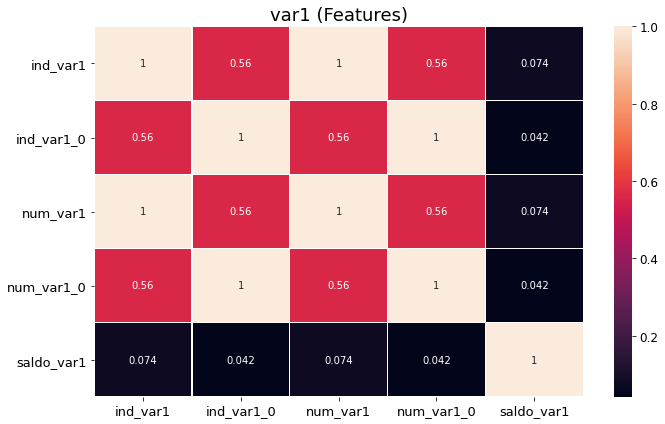

In [12]:
# Analisando a correlação entre as features numéricas de "var5" do tipo "float64":
ptlib.plot_corr_features(df=train_df, features=feat_groupby_vars['var1'], digits=3, title="var1 (Features)",
                         title_fontsize=18, xtick_labelsize=13, ytick_labelsize=13, width=10, height=6,
                         figure_id='plot_corr_features_var1', figure_path=PROJECT_IMG_PATH,
                         figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                        )

**Análise:** observando a **correlação entre as features** (**plot acima**) concluímos que:

1. **`ind_var1 x num_var_1`** são **colineares**, pois representam a mesma informação (`correlação = 1.0`);
2. **`ind_var1_0 x num_var_1_0`** são **colineares**, pois representam a mesma informação (`correlação = 1.0`);
2. **`saldo_var1`** não possui corrrelação com as demais features.

**Conclusão:** Portanto, entendemos que estas **features são `irrelevantes`** para serem analisadas na criação dos modelos preditivos.

In [13]:
# Armazenando informações sobre as features:
features = ['ind_var1', 'ind_var1_0']
santander_feat_info.save(key='Binary', features=features) # Categórica Nominal Binária.

features = ['num_var1', 'num_var1_0']
santander_feat_info.save(key='Discrete', features=features) # Quantitativa Discreta.

features = ['saldo_var1']
santander_feat_info.save(key='Continuous', features=features) # Quantitativa Contínua.

santander_feat_info.save(key='Irrelevant', features=feat_groupby_vars['var1']) # Irrelevantes.

## var2

In [14]:
# Resumo das informações:
train_df[feat_groupby_vars['var2']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60816 entries, 0 to 60815
Data columns (total 5 columns):
ind_var2           60816 non-null int64
ind_var2_0         60816 non-null int64
num_var2_0_ult1    60816 non-null int64
num_var2_ult1      60816 non-null int64
saldo_var2_ult1    60816 non-null int64
dtypes: int64(5)
memory usage: 2.3 MB


In [15]:
# Dataframe "train_df":
train_df[feat_groupby_vars['var2']].describe()

,ind_var2,ind_var2_0,num_var2_0_ult1,num_var2_ult1,saldo_var2_ult1
count,60816.0,60816.0,60816.0,60816.0,60816.0
mean,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0


In [16]:
# Obtendo os percentis a partir de "80%", com intervá-los de "5%":
result = dslib.get_features_percentiles(data=train_df, features=feat_groupby_vars['var2'], percent_range=range(80, 105, 5))
result

,ind_var2,ind_var2_0,num_var2_0_ult1,num_var2_ult1,saldo_var2_ult1
Percentile,,,,,
80%,0.0,0.0,0.0,0.0,0.0
85%,0.0,0.0,0.0,0.0,0.0
90%,0.0,0.0,0.0,0.0,0.0
95%,0.0,0.0,0.0,0.0,0.0
100%,0.0,0.0,0.0,0.0,0.0


In [17]:
# Vamos verificar a proporção dos valores para as variáveis relacionadas a "var2":
for feat in feat_groupby_vars['var2']:
    print(dslib.percent_count_feature(df=train_df, feature=feat, lines_drop=False))
    print()

          Total  Percent
ind_var2                
0         60816      1.0

            Total  Percent
ind_var2_0                
0           60816      1.0

                 Total  Percent
num_var2_0_ult1                
0                60816      1.0

               Total  Percent
num_var2_ult1                
0              60816      1.0

                 Total  Percent
saldo_var2_ult1                
0                60816      1.0



**Análise:** observamos que as **`features`** **`ind_var2`** e **`ind_var2_0`**, relacionadas com **`var2`**, são variáveis do tipo `Categóricas Nominais Binárias`, com apenas duas classes **`0`** e **`1`**. Entretanto, as **`features`** **`num_var2_0_ult1`** e **`num_var2_ult1`**, relacionadas com **`var2`**, são variáveis do tipo `Quantitativa Discreta`. A feature **`saldo_var2_ult1`** é uma variável do tipo `Quantitativa Contínua`.

Observamos, também, que nas features **`ind_var2`** e **`ind_var2_0`**, **`100%`** das observações estão concentradas na classe **`0`**. Enquanto que as features **`num_var2_0_ult1`**, **`num_var2_ult1`**, e **`saldo_var2_ult1`** possuem em **`100%`** das observações, valores iguais a **`0`**.

**Conclusão:** Portanto, entendemos que estas **features são `irrelevantes`** para serem analisadas na criação dos modelos preditivos.

In [18]:
# Armazenando informações sobre as features:
features = ['ind_var2', 'ind_var2_0']
santander_feat_info.save(key='Binary', features=features) # Categórica Nominal Binária.

features = ['num_var2_0_ult1', 'num_var2_ult1']
santander_feat_info.save(key='Discrete', features=features) # Quantitativa Discreta.

features = ['saldo_var2_ult1']
santander_feat_info.save(key='Continuous', features=features) # Quantitativa Contínua.

santander_feat_info.save(key='Irrelevant', features=feat_groupby_vars['var2']) # Irrelevantes.

## var6

In [19]:
# Resumo das informações:
train_df[feat_groupby_vars['var6']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60816 entries, 0 to 60815
Data columns (total 5 columns):
ind_var6      60816 non-null int64
ind_var6_0    60816 non-null int64
num_var6      60816 non-null int64
num_var6_0    60816 non-null int64
saldo_var6    60816 non-null float64
dtypes: float64(1), int64(4)
memory usage: 2.3 MB


Agora, vamos calcular algumas medidas **estatísticas descritivas** para análsise destas **`features`** em nosso dataset:

In [20]:
# Dataframe "train_df":
train_df[feat_groupby_vars['var6']].describe()

,ind_var6,ind_var6_0,num_var6,num_var6_0,saldo_var6
count,60816.000000,60816.000000,60816.000000,60816.000000,60816.000000
mean,0.000033,0.000132,0.000099,0.000395,0.518094
std,0.005735,0.011469,0.017204,0.034406,92.904907
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,3.000000,3.000000,19531.800000


In [21]:
# Obtendo os percentis a partir de "95%", com intervá-los de "1%":
result = dslib.get_features_percentiles(data=train_df, features=feat_groupby_vars['var6'], percent_range=range(95, 101, 1))
result

,ind_var6,ind_var6_0,num_var6,num_var6_0,saldo_var6
Percentile,,,,,
95%,0.0,0.0,0.0,0.0,0.0
96%,0.0,0.0,0.0,0.0,0.0
97%,0.0,0.0,0.0,0.0,0.0
98%,0.0,0.0,0.0,0.0,0.0
99%,0.0,0.0,0.0,0.0,0.0
100%,1.0,1.0,3.0,3.0,19531.8


In [22]:
# Vamos verificar a proporção dos valores para as variáveis relacionadas a "var6":
for feat in feat_groupby_vars['var6']:
    print(dslib.percent_count_feature(df=train_df, feature=feat, lines_drop=False))
    print()

          Total  Percent
ind_var6                
0         60814      1.0
1             2      0.0

            Total  Percent
ind_var6_0                
0           60808   0.9999
1               8   0.0001

          Total  Percent
num_var6                
0         60814      1.0
3             2      0.0

            Total  Percent
num_var6_0                
0           60808   0.9999
3               8   0.0001

            Total  Percent
saldo_var6                
0.0         60814      1.0
11976.6         1      0.0
19531.8         1      0.0



**Análise:** observamos que as **`features`** **`ind_var6`** e **`ind_var6_0`**, relacionadas com **`var6`**, são variáveis do tipo `Categóricas Nominais Binárias`, com apenas duas classes **`0`** e **`1`**. Entretanto, as **`features`** **`num_var6`** e **`num_var6_0`**, relacionadas com **`var6`**, são variáveis do tipo `Quantitativa Discrete`. A feature **`saldo_var6`** é uma variável do tipo `Quantitativa Contínua`.

Observamos, também, que nas features **`ind_var6`** e **`ind_var6_0`**, **`99.99%`** das observações estão concentradas na classe **`0`**, e nas features **`num_var6`** e **`num_var6_0`**, **`99.99%`** das observações possuem valores iguais a **`0`**. A feature **`saldo_var6`** possui, em **`99%`** das observações, também valores iguais a **`0`**.

**Conclusão:** Portanto, entendemos que estas **features são `irrelevantes`** para serem analisadas na criação dos modelos preditivos.

In [23]:
# Armazenando informações sobre as features:
features = ['ind_var6', 'ind_var6_0']
santander_feat_info.save(key='Binary', features=features) # Categórica Nominal Binária.

features = ['num_var6', 'num_var6_0']
santander_feat_info.save(key='Discrete', features=features) # Quantitativa Discreta.

features = ['saldo_var6']
santander_feat_info.save(key='Continuous', features=features) # Quantitativa Contínua.

santander_feat_info.save(key='Irrelevant', features=feat_groupby_vars['var6']) # Irrelevantes.

## var14

In [24]:
# Resumo das informações:
train_df[feat_groupby_vars['var14']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60816 entries, 0 to 60815
Data columns (total 5 columns):
ind_var14      60816 non-null int64
ind_var14_0    60816 non-null int64
num_var14      60816 non-null int64
num_var14_0    60816 non-null int64
saldo_var14    60816 non-null float64
dtypes: float64(1), int64(4)
memory usage: 2.3 MB


Agora, vamos calcular algumas medidas **estatísticas descritivas** para análsise destas **`features`** em nosso dataset:

In [25]:
# Dataframe "train_df":
train_df[feat_groupby_vars['var14']].describe()

,ind_var14,ind_var14_0,num_var14,num_var14_0,saldo_var14
count,60816.000000,60816.000000,60816.000000,60816.000000,60816.000000
mean,0.005278,0.023481,0.016081,0.072563,73.400380
std,0.072460,0.151426,0.224397,0.642269,3051.818963
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,12.000000,111.000000,450000.000000


In [26]:
# Obtendo os percentis a partir de "95%", com intervá-los de "1%":
result = dslib.get_features_percentiles(data=train_df, features=feat_groupby_vars['var14'], percent_range=range(95, 101, 1))
result

,ind_var14,ind_var14_0,num_var14,num_var14_0,saldo_var14
Percentile,,,,,
95%,0.0,0.0,0.0,0.0,0.0
96%,0.0,0.0,0.0,0.0,0.0
97%,0.0,0.0,0.0,0.0,0.0
98%,0.0,1.0,0.0,3.0,0.0
99%,0.0,1.0,0.0,3.0,0.0
100%,1.0,1.0,12.0,111.0,450000.0


In [27]:
# Vamos verificar a proporção dos valores para as variáveis relacionadas a "var14":
for feat in feat_groupby_vars['var14']:
    print(dslib.percent_count_feature(df=train_df, feature=feat, lines_drop=False))
    print()

           Total  Percent
ind_var14                
0          60495   0.9947
1            321   0.0053

             Total  Percent
ind_var14_0                
0            59388   0.9765
1             1428   0.0235

           Total  Percent
num_var14                
0          60495   0.9947
3            318   0.0052
6              2   0.0000
12             1   0.0000

             Total  Percent
num_var14_0                
0            59388   0.9765
3             1422   0.0234
6                4   0.0001
12               1   0.0000
111              1   0.0000

             Total  Percent
saldo_var14                
0.00         60495   0.9947
3000.00          8   0.0001
1200.00          6   0.0001
600.00           5   0.0001
450.00           4   0.0001
...            ...      ...
824.46           1   0.0000
900.06           1   0.0000
900.27           1   0.0000
960.06           1   0.0000
450000.00        1   0.0000

[279 rows x 2 columns]



**Análise:** observamos que as **`features`** **`ind_var14`** e **`ind_var14_0`**, relacionadas com **`var14`**, são variáveis do tipo `Categóricas Nominais Binárias`, com apenas duas classes **`0`** e **`1`**. Entretanto, as **`features`** **`num_var14`** e **`num_var14_0`**, relacionadas com **`var14`**, são variáveis do tipo `Quantitativa Discreta`. A feature **`saldo_var14`** é uma variável do tipo `Quantitativa Contínua`.

Observamos, também, que nas features **`ind_var14`** e **`ind_var14_0`**, **`99%`** e **`98%`** das observações, respectivamente, estão concentradas na classe **`0`**, e nas features **`num_var14`** e **`num_var14_0`**, **`99%`** e **`98%`** das observações, respectivamente, pussuem valores iguais a **`0`**. A feature **`saldo_var14`** possui em **`99%`** das observações, valores iguais a **`0`**.

**Conclusão:** Portanto, entendemos que estas **features são `irrelevantes`** para serem analisadas na criação dos modelos preditivos.

In [28]:
# Armazenando informações sobre as features:
features = ['ind_var14', 'ind_var14_0']
santander_feat_info.save(key='Binary', features=features) # Categórica Nominal Binária.

features = ['num_var14', 'num_var14_0']
santander_feat_info.save(key='Discrete', features=features) # Quantitativa Discreta.

features = ['saldo_var14']
santander_feat_info.save(key='Continuous', features=features) # Quantitativa Contínua.

santander_feat_info.save(key='Irrelevant', features=feat_groupby_vars['var14']) # Irrelevantes.

## var20

In [29]:
# Resumo das informações:
train_df[feat_groupby_vars['var20']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60816 entries, 0 to 60815
Data columns (total 5 columns):
ind_var20      60816 non-null int64
ind_var20_0    60816 non-null int64
num_var20      60816 non-null int64
num_var20_0    60816 non-null int64
saldo_var20    60816 non-null float64
dtypes: float64(1), int64(4)
memory usage: 2.3 MB


Agora, vamos calcular algumas medidas **estatísticas descritivas** para análsise destas **`features`** em nosso dataset:

In [30]:
# Dataframe "train_df":
train_df[feat_groupby_vars['var20']].describe()

,ind_var20,ind_var20_0,num_var20,num_var20_0,saldo_var20
count,60816.000000,60816.000000,60816.000000,60816.000000,60816.000000
mean,0.002483,0.003453,0.007449,0.010359,29.460104
std,0.049767,0.058662,0.149302,0.175985,2748.430264
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,3.000000,3.000000,455858.160000


In [31]:
# Obtendo os percentis a partir de "95%", com intervá-los de "1%":
result = dslib.get_features_percentiles(data=train_df, features=feat_groupby_vars['var20'], percent_range=range(95, 101, 1))
result

,ind_var20,ind_var20_0,num_var20,num_var20_0,saldo_var20
Percentile,,,,,
95%,0.0,0.0,0.0,0.0,0.00
96%,0.0,0.0,0.0,0.0,0.00
97%,0.0,0.0,0.0,0.0,0.00
98%,0.0,0.0,0.0,0.0,0.00
99%,0.0,0.0,0.0,0.0,0.00
100%,1.0,1.0,3.0,3.0,455858.16


In [32]:
# Vamos verificar a proporção dos valores para as variáveis relacionadas a "var20":
for feat in feat_groupby_vars['var20']:
    print(dslib.percent_count_feature(df=train_df, feature=feat, lines_drop=False))
    print()

           Total  Percent
ind_var20                
0          60665   0.9975
1            151   0.0025

             Total  Percent
ind_var20_0                
0            60606   0.9965
1              210   0.0035

           Total  Percent
num_var20                
0          60665   0.9975
3            151   0.0025

             Total  Percent
num_var20_0                
0            60606   0.9965
3              210   0.0035

             Total  Percent
saldo_var20                
0.00         60665   0.9975
150.00           3   0.0000
300.12           3   0.0000
900.36           3   0.0000
300.00           3   0.0000
...            ...      ...
900.30           1   0.0000
900.21           1   0.0000
600.33           1   0.0000
600.30           1   0.0000
455858.16        1   0.0000

[136 rows x 2 columns]



**Análise:** observamos que as **`features`** **`ind_var20`** e **`ind_var20_0`**, relacionadas com **`var20`**, são variáveis do tipo `Categóricas Nominais Binárias`, com apenas duas classes **`0`** e **`1`**. Entretanto, as **`features`** **`num_var20`** e **`num_var20_0`**, relacionadas com **`var20`**, são variáveis do tipo `Quantitativa Discreta`. A feature **`saldo_var20`** é uma variável do tipo `Quantitativa Contínua`.

Observamos, também, que nas features **`ind_var20`** e **`ind_var20_0`**, **`99%`** das observações estão concentradas na classe **`0`**, e nas features **`num_var20`** e **`num_var20_0`**, **`99%`** das observações possuem valores iguais a **`0`**. A feature **`saldo_var20`** possui em **`99%`** das observações, valores iguais a **`0`**.

**Conclusão:** Portanto, entendemos que estas **features são `irrelevantes`** para serem analisadas na criação dos modelos preditivos.

In [33]:
# Armazenando informações sobre as features:
features = ['ind_var20', 'ind_var20_0']
santander_feat_info.save(key='Binary', features=features) # Categórica Nominal Binária.

features = ['num_var20', 'num_var20_0']
santander_feat_info.save(key='Discrete', features=features) # Quantitativa Discreta.

features = ['saldo_var20']
santander_feat_info.save(key='Continuous', features=features) # Quantitativa Contínua.

santander_feat_info.save(key='Irrelevant', features=feat_groupby_vars['var20']) # Irrelevantes.

## var22

In [34]:
# Resumo das informações:
train_df[feat_groupby_vars['var22']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60816 entries, 0 to 60815
Data columns (total 5 columns):
num_med_var22_ult3    60816 non-null int64
num_var22_hace2       60816 non-null int64
num_var22_hace3       60816 non-null int64
num_var22_ult1        60816 non-null int64
num_var22_ult3        60816 non-null int64
dtypes: int64(5)
memory usage: 2.3 MB


Agora, vamos calcular algumas medidas **estatísticas descritivas** para análsise destas **`features`** em nosso dataset:

In [35]:
# Dataframe "train_df":
train_df[feat_groupby_vars['var22']].describe()

,num_med_var22_ult3,num_var22_hace2,num_var22_hace3,num_var22_ult1,num_var22_ult3
count,60816.000000,60816.000000,60816.000000,60816.000000,60816.000000
mean,0.641131,1.305495,1.187253,0.566397,3.059146
std,1.848512,3.477569,3.256957,2.131784,6.245634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,3.000000
max,78.000000,123.000000,108.000000,96.000000,234.000000


In [36]:
# Obtendo os percentis a partir de "80%", com intervá-los de "1%":
result = dslib.get_features_percentiles(data=train_df, features=feat_groupby_vars['var22'], percent_range=range(80, 101, 1))
result

,num_med_var22_ult3,num_var22_hace2,num_var22_hace3,num_var22_ult1,num_var22_ult3
Percentile,,,,,
80%,0.0,3.0,0.0,0.0,6.0
81%,0.0,3.0,0.0,0.0,6.0
82%,0.0,3.0,3.0,0.0,6.0
83%,0.0,3.0,3.0,0.0,6.0
84%,0.0,3.0,3.0,0.0,6.0
85%,0.0,3.0,3.0,0.0,6.0
86%,3.0,3.0,3.0,0.0,9.0
87%,3.0,3.0,3.0,0.0,9.0
88%,3.0,3.0,3.0,0.0,9.0


In [37]:
# Vamos verificar a proporção dos valores para as variáveis relacionadas a "var22":
for feat in feat_groupby_vars['var22']:
    print(dslib.percent_count_feature(df=train_df, feature=feat, lines_drop=False))
    print()

                    Total  Percent
num_med_var22_ult3                
0                   51711   0.8503
3                    6495   0.1068
6                    1809   0.0297
9                     545   0.0090
12                    161   0.0026
15                     52   0.0009
18                     20   0.0003
21                      8   0.0001
24                      4   0.0001
27                      4   0.0001
30                      2   0.0000
33                      2   0.0000
48                      1   0.0000
51                      1   0.0000
78                      1   0.0000

                 Total  Percent
num_var22_hace2                
0                48419   0.7962
3                 5930   0.0975
6                 3116   0.0512
9                 1540   0.0253
12                 822   0.0135
15                 441   0.0073
18                 220   0.0036
21                 139   0.0023
24                  82   0.0013
27                  41   0.0007
30                  

**Análise:** observamos que todas as **`features`** relacionadas com **`var22`**, são variáveis do tipo `Quantitativa Discreta`. Agora, vamos verificar se existe alguma **correlação** entre as **`features`** de **`var22`**:

Saving figure: plot_corr_features_var22


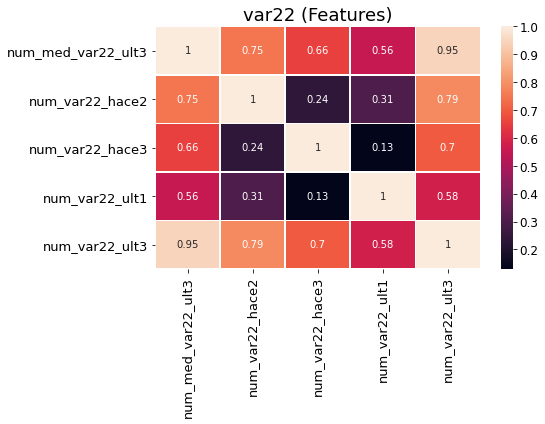

In [38]:
# Analisando a correlação entre as features numéricas de "var22":
ptlib.plot_corr_features(df=train_df, features=feat_groupby_vars['var22'], digits=3, title="var22 (Features)",
                         title_fontsize=18, xtick_labelsize=13, ytick_labelsize=13, width=8, height=6,
                         figure_id='plot_corr_features_var22', figure_path=PROJECT_IMG_PATH,
                         figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                        )

**Análise:** observando a **correlação entre as features** (**plot acima**) concluímos que:
1. **`num_med_var22_ult3 x num_var22_hace2`** possuem uma alta correlação positiva (`correlação = 0.75`);
2. **`num_med_var22_ult3 x num_var22_hace3`** possuem uma média correlação positiva (`correlação = 0.66`);
3. **`num_med_var22_ult3 x num_var22_ult1`** possuem uma média correlação positiva (`correlação = 0.56`);
4. **`num_med_var22_ult3 x num_var22_ult3`** são **colineares**, pois representam a mesma informação (`correlação = 0.95`);
5. **`num_var22_hace2 x num_var22_hace3`** não possuem correlação (`correlação = 0.24`);
6. **`num_var22_hace2 x num_var22_ult1`** não possuem correlação (`correlação = 0.31`);
7. **`num_var22_hace2 x num_var22_ult3`** possuem uma alta correlação positiva (`correlação = 0.79`);
8. **`num_var22_hace3 x num_var22_ult1`** não possuem correlação (`correlação = 0.13`);
9. **`num_var22_hace3 x num_var22_ult3`** possuem uma alta correlação positiva (`correlação = 0.70`);
10. **`num_var22_ult1 x num_var22_ult3`** possuem uma média correlação positiva (`correlação = 0.58`).

Vamos analisar as suas distribuições de frequências (*Histograma*) e também verificar se existem **outliers** com os gráficos de *BoxPlot*.

Saving figure: plot_histograms_var22


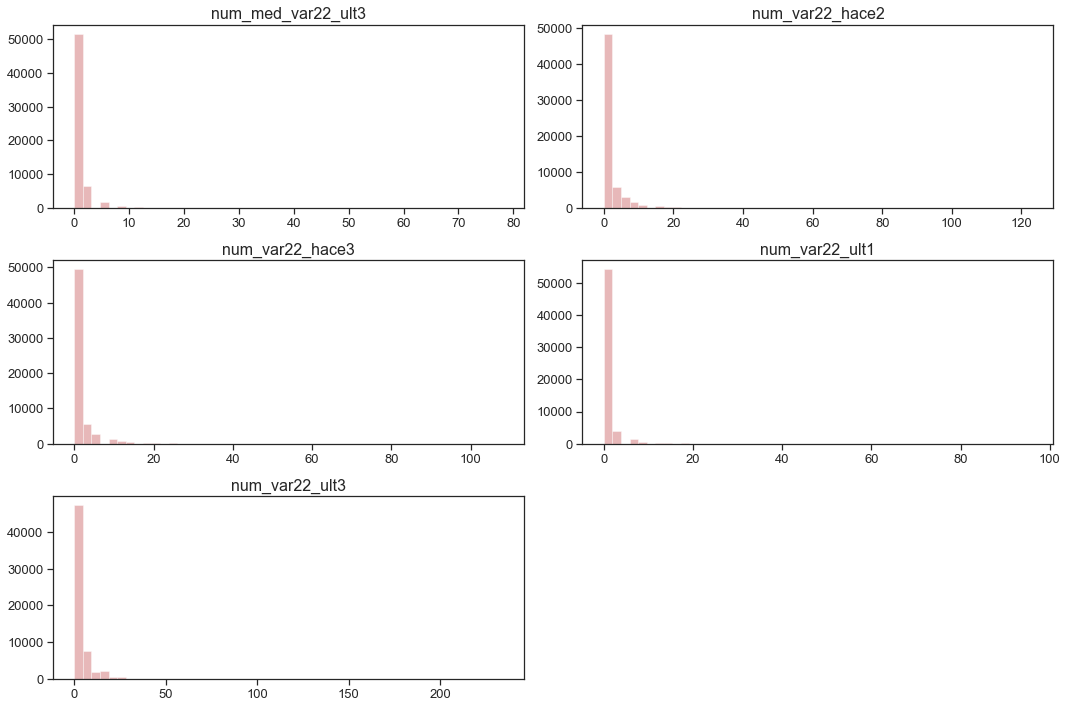

In [39]:
# Desenhando os histogramas para as features de "var22":
ptlib.plot_histograms_features(df=train_df, features=feat_groupby_vars['var22'], plot_style='ticks', kde=False, colors='r',
                               titles=feat_groupby_vars['var22'], titles_fontsize=16, xlabels=None, xlabels_fontsize=13,
                               ylabels=None, ylabels_fontsize=13, xtick_labelsize=13, ytick_labelsize=13,
                               cols_nr=2, rows_nr=3, width=15, height=10, wspace=None, hspace=None,
                               figure_id="plot_histograms_var22", figure_path=PROJECT_IMG_PATH,
                               figure_file_format="png", figure_file_extension=".png",
                               tight_layout=True, dpi=300
                              )

Saving figure: plot_boxplots_var22


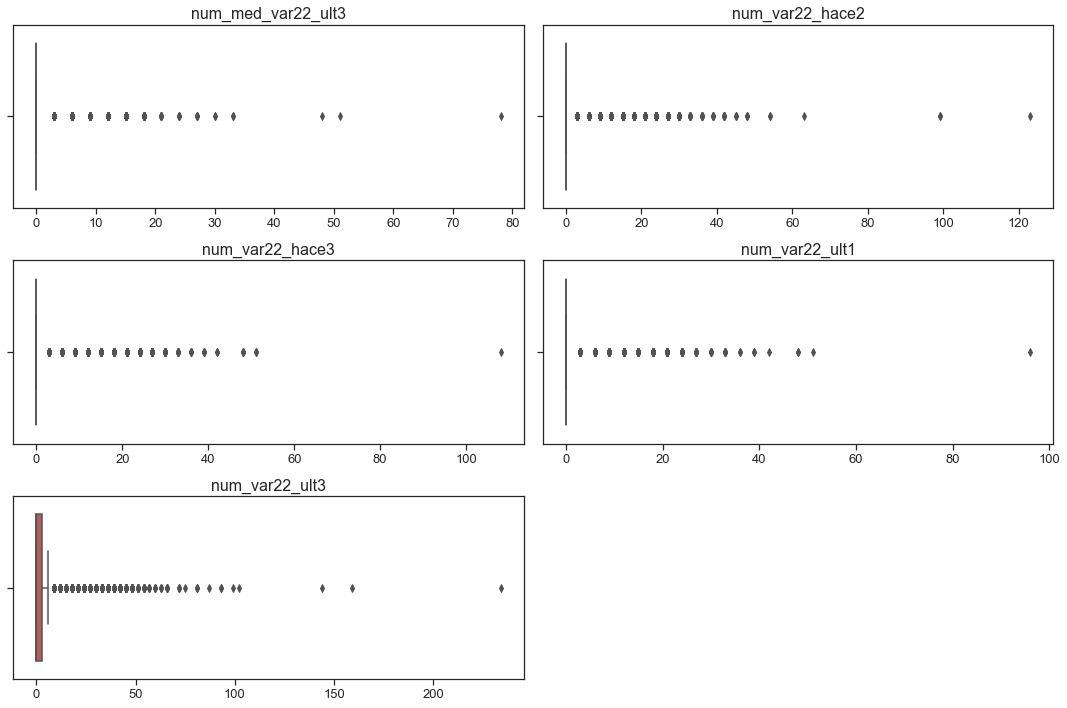

In [40]:
# Desenhando os boxplots para as features de "var22":
ptlib.plot_boxplots_features(df=train_df, features=feat_groupby_vars['var22'], plot_style='ticks', colors='r',
                             orient='h', saturation=0.75,
                             titles=feat_groupby_vars['var22'], titles_fontsize=16, xlabels=None, xlabels_fontsize=13,
                             ylabels=None, ylabels_fontsize=13, xtick_labelsize=13, ytick_labelsize=13,
                             cols_nr=2, rows_nr=3, width=15, height=10, wspace=None, hspace=None,
                             figure_id="plot_boxplots_var22", figure_path=PROJECT_IMG_PATH,
                             figure_file_format="png", figure_file_extension=".png",
                             tight_layout=True, dpi=300
                            )

**Análise:** Temos uma alta variabilidade nos dados ocasionada pelos **outliers** (*Box Plot*). Também podemos observar que as distribuições de frequência em todas as features estão concentradas em valores iguais a **`0`** (**`66%`** dos valores na feature **`num_var22_ult3`**, e acima de **`80%`** dos valores nas outras features), conforme podemos observar no *histograma* e no relatório de *percentis*.

**Conclusão:**

1. Para as **features** **`num_med_var22_ult3`**, **`num_var22_hace2`**, **`num_var22_hace3`** e **`num_var22_ult1`**, a grande maioria dos valores são constantes e iguais a **`0`**. Portanto, entendemos que estas **features são `irrelevantes`** para serem analisadas na criação dos modelos preditivos;

2. A feature **`num_med_var22_ult3`** que possui a mesma informação da feature **`num_var22_ult3`**, pois são **colineares** (`correlação = 0.95`);

3. Entendemos que a feature **`num_var22_ult3`** é **`relevante`** e deverá ser analisada na criação dos modelos preditivos.

In [41]:
# Armazenando informações sobre as features:
santander_feat_info.save(key='Discrete', features=feat_groupby_vars['var22']) # Quantitativa Discreta.
santander_feat_info.save(key='Outliers', features=['num_var22_ult3'])         # Variável têm "Outliers".

features = ['num_med_var22_ult3', 'num_var22_hace2', 'num_var22_hace3', 'num_var22_ult1']
santander_feat_info.save(key='Irrelevant', features=features) # Irrelevantes.

## var24

In [42]:
# Resumo das informações:
train_df[feat_groupby_vars['var24']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60816 entries, 0 to 60815
Data columns (total 5 columns):
ind_var24      60816 non-null int64
ind_var24_0    60816 non-null int64
num_var24      60816 non-null int64
num_var24_0    60816 non-null int64
saldo_var24    60816 non-null float64
dtypes: float64(1), int64(4)
memory usage: 2.3 MB


Agora, vamos calcular algumas medidas **estatísticas descritivas** para análsise destas **`features`** em nosso dataset:

In [43]:
# Dataframe "train_df":
train_df[feat_groupby_vars['var24']].describe()

,ind_var24,ind_var24_0,num_var24,num_var24_0,saldo_var24
count,60816.000000,60816.000000,60816.000000,60816.000000,6.081600e+04
mean,0.038329,0.042735,0.115134,0.128848,6.042704e+03
std,0.191990,0.202262,0.577096,0.611630,4.961221e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00
75%,0.000000,0.000000,0.000000,0.000000,0.000000e+00
max,1.000000,1.000000,6.000000,9.000000,3.008077e+06


In [44]:
# Obtendo os percentis a partir de "95%", com intervá-los de "1%":
result = dslib.get_features_percentiles(data=train_df, features=feat_groupby_vars['var24'], percent_range=range(95, 101, 1))
result

,ind_var24,ind_var24_0,num_var24,num_var24_0,saldo_var24
Percentile,,,,,
95%,0.0,0.0,0.0,0.0,0.000000e+00
96%,0.0,1.0,0.0,3.0,0.000000e+00
97%,1.0,1.0,3.0,3.0,3.131196e+04
98%,1.0,1.0,3.0,3.0,9.691388e+04
99%,1.0,1.0,3.0,3.0,2.062186e+05
100%,1.0,1.0,6.0,9.0,3.008077e+06


In [45]:
# Vamos verificar a proporção dos valores para as variáveis relacionadas a "var24":
for feat in feat_groupby_vars['var24']:
    print(dslib.percent_count_feature(df=train_df, feature=feat, lines_drop=False))
    print()

           Total  Percent
ind_var24                
0          58485   0.9617
1           2331   0.0383

             Total  Percent
ind_var24_0                
0            58217   0.9573
1             2599   0.0427

           Total  Percent
num_var24                
0          58485   0.9617
3           2328   0.0383
6              3   0.0000

             Total  Percent
num_var24_0                
0            58217   0.9573
3             2587   0.0425
6               11   0.0002
9                1   0.0000

             Total  Percent
saldo_var24                
0.00         58485   0.9617
30000.00         8   0.0001
300385.68        7   0.0001
150392.37        7   0.0001
300000.00        6   0.0001
...            ...      ...
60900.00         1   0.0000
60792.66         1   0.0000
60747.45         1   0.0000
60718.65         1   0.0000
3008077.32       1   0.0000

[2130 rows x 2 columns]



**Análise:** observamos que as **`features`** **`ind_var24`** e **`ind_var24_0`**, relacionadas com **`var24`**, são variáveis do tipo `Categóricas Nominais Binárias`, com apenas duas classes **`0`** e **`1`**. Entretanto, as **`features`** **`num_var24`** e **`num_var24_0`**, relacionadas com **`var24`**, são variáveis do tipo `Quantitativa Discreta`. A feature **`saldo_var24`** é uma variável do tipo `Quantitativa Contínua`.

Observamos, também, que nas features **`ind_var24`** e **`ind_var24_0`**, **`96%`** das observações estão concentradas na classe **`0`**. As features **`num_var24`** e **`num_var24_0`**, possuem em **`96%`** e **`95%`** das observações valores iguais a **`0`**, respectivamente. A feature **`saldo_var24`** também possui em **`95%`** das observações, valores iguais a **`0`**.

**Conclusão:** Portanto, entendemos que estas **features são `irrelevantes`** para serem analisadas na criação dos modelos preditivos.

In [46]:
# Armazenando informações sobre as features:
features = ['ind_var24', 'ind_var24_0']
santander_feat_info.save(key='Binary', features=features) # Categórica Nominal Binária.

features = ['num_var24', 'num_var24_0']
santander_feat_info.save(key='Discrete', features=features) # Quantitativa Discreta.

features = ['saldo_var24']
santander_feat_info.save(key='Continuous', features=features) # Quantitativa Contínua.

santander_feat_info.save(key='Irrelevant', features=feat_groupby_vars['var24']) # Irrelevantes.

## var27

In [47]:
# Resumo das informações:
train_df[feat_groupby_vars['var27']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60816 entries, 0 to 60815
Data columns (total 5 columns):
ind_var27      60816 non-null int64
ind_var27_0    60816 non-null int64
num_var27      60816 non-null int64
num_var27_0    60816 non-null int64
saldo_var27    60816 non-null int64
dtypes: int64(5)
memory usage: 2.3 MB


Agora, vamos calcular algumas medidas **estatísticas descritivas** para análsise destas **`features`** em nosso dataset:

In [48]:
# Dataframe "train_df":
train_df[feat_groupby_vars['var27']].describe()

,ind_var27,ind_var27_0,num_var27,num_var27_0,saldo_var27
count,60816.0,60816.0,60816.0,60816.0,60816.0
mean,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0


In [49]:
# Obtendo os percentis a partir de "80%", com intervá-los de "5%":
result = dslib.get_features_percentiles(data=train_df, features=feat_groupby_vars['var27'], percent_range=range(80, 105, 5))
result

,ind_var27,ind_var27_0,num_var27,num_var27_0,saldo_var27
Percentile,,,,,
80%,0.0,0.0,0.0,0.0,0.0
85%,0.0,0.0,0.0,0.0,0.0
90%,0.0,0.0,0.0,0.0,0.0
95%,0.0,0.0,0.0,0.0,0.0
100%,0.0,0.0,0.0,0.0,0.0


In [50]:
# Vamos verificar a proporção dos valores para as variáveis relacionadas a "var27":
for feat in feat_groupby_vars['var27']:
    print(dslib.percent_count_feature(df=train_df, feature=feat, lines_drop=False))
    print()

           Total  Percent
ind_var27                
0          60816      1.0

             Total  Percent
ind_var27_0                
0            60816      1.0

           Total  Percent
num_var27                
0          60816      1.0

             Total  Percent
num_var27_0                
0            60816      1.0

             Total  Percent
saldo_var27                
0            60816      1.0



**Análise:** observamos que as **`features`** **`ind_var27`** e **`ind_var27_0`**, relacionadas com **`var27`**, são variáveis do tipo `Categóricas Nominais Binárias`, com apenas duas classes **`0`** e **`1`**. Entretanto, as **`features`** **`num_var27`** e **`num_var27_0`**, relacionadas com **`var27`**, são variáveis do tipo `Quantitativa Discreta`. A feature **`saldo_var27`** é uma variável do tipo `Quantitativa Contínua`.

Observamos, também, que nas features **`ind_var27`** e **`ind_var27_0`**, **`100%`** das observações estão concentradas na classe **`0`**. As features **`num_var27`**, **`num_var27_0`**, e **`saldo_var27`**, possuem em **`100%`** das observações, valores iguais a **`0`**.

**Conclusão:** Portanto, entendemos que estas **features são `irrelevantes`** para serem analisadas na criação dos modelos preditivos.

In [51]:
# Armazenando informações sobre as features:
features = ['ind_var27', 'ind_var27_0']
santander_feat_info.save(key='Binary', features=features) # Categórica Nominal Binária.

features = ['num_var27', 'num_var27_0']
santander_feat_info.save(key='Discrete', features=features) # Quantitativa Discreta.

features = ['saldo_var27']
santander_feat_info.save(key='Continuous', features=features) # Quantitativa Contínua.

santander_feat_info.save(key='Irrelevant', features=feat_groupby_vars['var27']) # Irrelevantes.

## var28

In [52]:
# Resumo das informações:
train_df[feat_groupby_vars['var28']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60816 entries, 0 to 60815
Data columns (total 5 columns):
ind_var28      60816 non-null int64
ind_var28_0    60816 non-null int64
num_var28      60816 non-null int64
num_var28_0    60816 non-null int64
saldo_var28    60816 non-null int64
dtypes: int64(5)
memory usage: 2.3 MB


Agora, vamos calcular algumas medidas **estatísticas descritivas** para análsise destas **`features`** em nosso dataset:

In [53]:
# Dataframe "train_df":
train_df[feat_groupby_vars['var28']].describe()

,ind_var28,ind_var28_0,num_var28,num_var28_0,saldo_var28
count,60816.0,60816.0,60816.0,60816.0,60816.0
mean,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0


In [54]:
# Obtendo os percentis a partir de "80%", com intervá-los de "5%":
result = dslib.get_features_percentiles(data=train_df, features=feat_groupby_vars['var28'], percent_range=range(80, 105, 5))
result

,ind_var28,ind_var28_0,num_var28,num_var28_0,saldo_var28
Percentile,,,,,
80%,0.0,0.0,0.0,0.0,0.0
85%,0.0,0.0,0.0,0.0,0.0
90%,0.0,0.0,0.0,0.0,0.0
95%,0.0,0.0,0.0,0.0,0.0
100%,0.0,0.0,0.0,0.0,0.0


In [55]:
# Vamos verificar a proporção dos valores para as variáveis relacionadas a "var28":
for feat in feat_groupby_vars['var28']:
    print(dslib.percent_count_feature(df=train_df, feature=feat, lines_drop=False))
    print()

           Total  Percent
ind_var28                
0          60816      1.0

             Total  Percent
ind_var28_0                
0            60816      1.0

           Total  Percent
num_var28                
0          60816      1.0

             Total  Percent
num_var28_0                
0            60816      1.0

             Total  Percent
saldo_var28                
0            60816      1.0



**Análise:** observamos que as **`features`** **`ind_var28`** e **`ind_var28_0`**, relacionadas com **`var28`**, são variáveis do tipo `Categóricas Nominais Binárias`, com apenas duas classes **`0`** e **`1`**. Entretanto, as **`features`** **`num_var28`** e **`num_var28_0`**, relacionadas com **`var28`**, são variáveis do tipo `Quantitativa Discreta`. A feature **`saldo_var28`** é uma variável do tipo `Quantitativa Contínua`.

Observamos, também, que nas features **`ind_var28`** e **`ind_var28_0`**, **`100%`** das observações estão concentradas na classe **`0`**. As features **`num_var28`**, **`num_var28_0`**, e **`saldo_var28`**, possuem em **`100%`** das observações, valores iguais a **`0`**.

**Conclusão:** Portanto, entendemos que estas **features são `irrelevantes`** para serem analisadas na criação dos modelos preditivos.

In [56]:
# Armazenando informações sobre as features:
features = ['ind_var28', 'ind_var28_0']
santander_feat_info.save(key='Binary', features=features) # Categórica Nominal Binária.

features = ['num_var28', 'num_var28_0']
santander_feat_info.save(key='Discrete', features=features) # Quantitativa Discreta.

features = ['saldo_var28']
santander_feat_info.save(key='Continuous', features=features) # Quantitativa Contínua.

santander_feat_info.save(key='Irrelevant', features=feat_groupby_vars['var28']) # Irrelevantes.

## var30

In [57]:
# Resumo das informações:
train_df[feat_groupby_vars['var30']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60816 entries, 0 to 60815
Data columns (total 5 columns):
ind_var30      60816 non-null int64
ind_var30_0    60816 non-null int64
num_var30      60816 non-null int64
num_var30_0    60816 non-null int64
saldo_var30    60816 non-null float64
dtypes: float64(1), int64(4)
memory usage: 2.3 MB


Agora, vamos calcular algumas medidas **estatísticas descritivas** para análsise destas **`features`** em nosso dataset:

In [58]:
# Dataframe "train_df":
train_df[feat_groupby_vars['var30']].describe()

,ind_var30,ind_var30_0,num_var30,num_var30_0,saldo_var30
count,60816.000000,60816.000000,60816.000000,60816.000000,6.081600e+04
mean,0.733097,0.995659,2.384323,3.374309,1.388042e+04
std,0.442345,0.065743,1.642766,1.349025,6.467857e+04
min,0.000000,0.000000,0.000000,0.000000,-4.942260e+03
25%,0.000000,1.000000,0.000000,3.000000,0.000000e+00
50%,1.000000,1.000000,3.000000,3.000000,3.000000e+00
75%,1.000000,1.000000,3.000000,3.000000,2.403075e+02
max,1.000000,1.000000,33.000000,114.000000,3.458077e+06


In [59]:
# Obtendo os percentis a partir de "75%", com intervá-los de "1%":
result = dslib.get_features_percentiles(data=train_df, features=feat_groupby_vars['var30'], percent_range=range(75, 101, 1))
result

,ind_var30,ind_var30_0,num_var30,num_var30_0,saldo_var30
Percentile,,,,,
75%,1.0,1.0,3.0,3.0,2.403075e+02
76%,1.0,1.0,3.0,3.0,3.000000e+02
77%,1.0,1.0,3.0,3.0,3.630000e+02
78%,1.0,1.0,3.0,3.0,4.620720e+02
79%,1.0,1.0,3.0,3.0,6.000000e+02
80%,1.0,1.0,3.0,3.0,7.299300e+02
81%,1.0,1.0,3.0,3.0,9.000000e+02
82%,1.0,1.0,3.0,3.0,1.101171e+03
83%,1.0,1.0,3.0,3.0,1.380135e+03


In [60]:
# Vamos verificar a proporção dos valores para as variáveis relacionadas a "var30":
for feat in feat_groupby_vars['var30']:
    print(dslib.percent_count_feature(df=train_df, feature=feat, lines_drop=False))
    print()

           Total  Percent
ind_var30                
1          44584   0.7331
0          16232   0.2669

             Total  Percent
ind_var30_0                
1            60552   0.9957
0              264   0.0043

           Total  Percent
num_var30                
3          41162   0.6768
0          16232   0.2669
6           3135   0.0515
9            259   0.0043
12            21   0.0003
15             5   0.0001
18             1   0.0000
33             1   0.0000

             Total  Percent
num_var30_0                
3            54433   0.8950
6             4579   0.0753
9             1402   0.0231
0              264   0.0043
12             123   0.0020
15              12   0.0002
18               1   0.0000
33               1   0.0000
114              1   0.0000

             Total  Percent
saldo_var30                
0.00         16232   0.2669
3.00         14587   0.2399
90.00         4214   0.0693
30.00         1253   0.0206
15.00         1185   0.0195
...            .

**Análise:** observamos que as **`features`** **`ind_var30`** e **`ind_var30_0`**, relacionadas com **`var30`**, são variáveis do tipo `Categóricas Nominais Binárias`, com apenas duas classes **`0`** e **`1`**. Entretanto, as **`features`** **`num_var30`** e **`num_var30_0`**, relacionadas com **`var30`**, são variáveis do tipo `Quantitativa Discreta`. A feature **`saldo_var30`** é uma variável do tipo `Quantitativa Contínua`.

Agora, vamos analisar, para as features **`num_var30`**, **`num_var30_0`** e **`saldo_var30`**, as suas distribuições de frequências (*Histograma*) e também verificar se existem **outliers** com um *BoxPlot*.

Saving figure: plot_histograms_var30


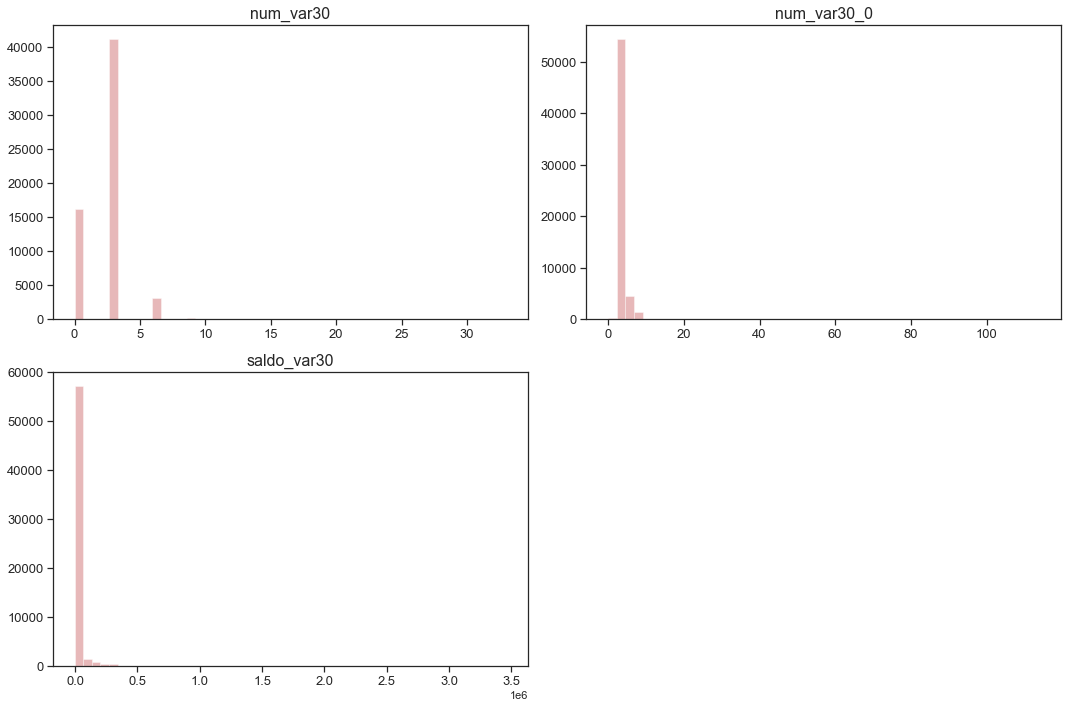

In [61]:
# Desenhando os histogramas para as features 'num_var30', 'num_var30_0' e 'saldo_var30' de "var30":
# Features:
feats = ['num_var30', 'num_var30_0', 'saldo_var30']

# Histogramas:
ptlib.plot_histograms_features(df=train_df, features=feats, plot_style='ticks', kde=False, colors='r',
                               titles=feats, titles_fontsize=16, xlabels=None, xlabels_fontsize=13,
                               ylabels=None, ylabels_fontsize=13, xtick_labelsize=13, ytick_labelsize=13,
                               cols_nr=2, rows_nr=2, width=15, height=10, wspace=None, hspace=None,
                               figure_id="plot_histograms_var30", figure_path=PROJECT_IMG_PATH,
                               figure_file_format="png", figure_file_extension=".png",
                               tight_layout=True, dpi=300
                              )

Saving figure: plot_boxplots_var30


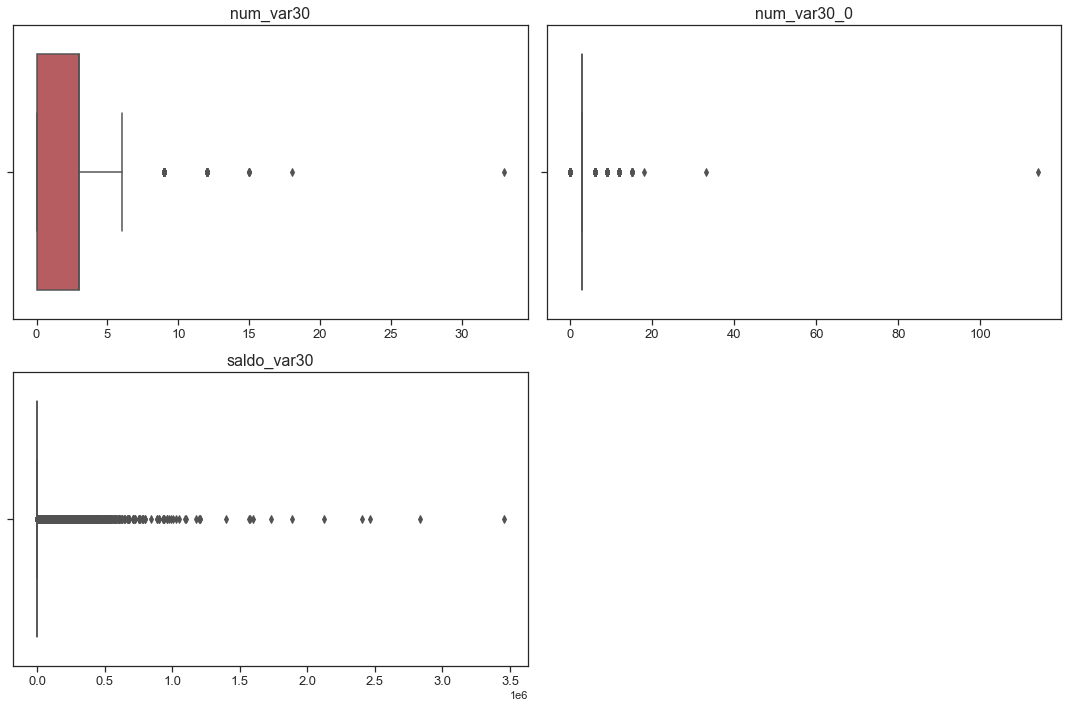

In [62]:
# Desenhando os histogramas para as features 'num_var30', 'num_var30_0' e 'saldo_var30' de "var30":
# Features:
feats = ['num_var30', 'num_var30_0', 'saldo_var30']

# BoxPlots:
ptlib.plot_boxplots_features(df=train_df, features=feats, plot_style='ticks', colors='r',
                             orient='h', saturation=0.75,
                             titles=feats, titles_fontsize=16, xlabels=None, xlabels_fontsize=13,
                             ylabels=None, ylabels_fontsize=13, xtick_labelsize=13, ytick_labelsize=13,
                             cols_nr=2, rows_nr=2, width=15, height=10, wspace=None, hspace=None,
                             figure_id="plot_boxplots_var30", figure_path=PROJECT_IMG_PATH,
                             figure_file_format="png", figure_file_extension=".png",
                             tight_layout=True, dpi=300
                            )

Agora, vamos verificar se existe alguma **correlação** entre as **`features`** de **`var30`**:

Saving figure: plot_corr_features_var30


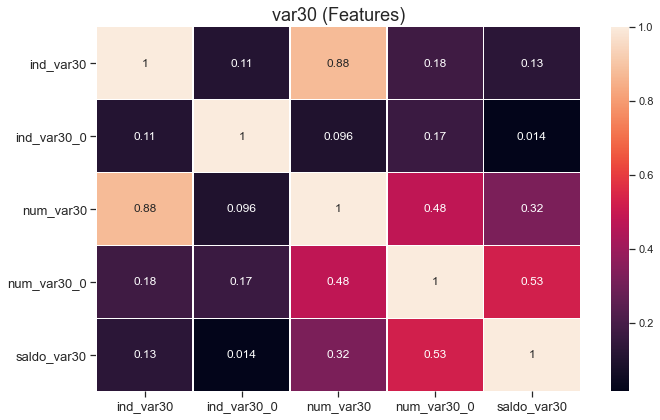

In [63]:
# Analisando a correlação entre as features de "var30":
ptlib.plot_corr_features(df=train_df, features=feat_groupby_vars['var30'], digits=3, title="var30 (Features)",
                         title_fontsize=18, xtick_labelsize=13, ytick_labelsize=13, width=10, height=6,
                         figure_id='plot_corr_features_var30', figure_path=PROJECT_IMG_PATH,
                         figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                        )

**Análise:**

1. As features `ind_var30` e `num_var_30` possuem uma **alta correlação positiva** (`correlação = 0.88`);

2. Na feature `ind_var30_0`, `99%` dos valores pertencem a categoria `1`;

3. Na feature `num_var30`,  observamos que existe uma alta variabilidade nos dados ocasionada pelos **outliers** (*Box Plot*). Os **outliers** estão concentrados nos **valores acima de `8`**. No histograma, podemos notar que existe um *pico* de observações (**`68%`**) com valores iguais a `3`. Também podemos observar que `99%` da sua distribuição de frequência está concentrada em um faixa de valores entre **`0` e `6`**, conforme podemos observar no *histograma* e no relatório de *percentis*;

4. Na feature `num_var30_0`,  observamos que existe uma alta variabilidade nos dados ocasionada pelos **outliers** (*Box Plot*). Os **outliers** estão concentrados nos **valores iguais a `0` e acima de `9`**. No histograma, podemos notar que existe um *pico* de observações (**`90%`**) com valores iguais a `3`. Também podemos observar que `97%` da sua distribuição de frequência está concentrada em um faixa de valores entre **`0` e `6`**, conforme podemos observar no *histograma* e no relatório de *percentis*;

5. Na feature `saldo_var30`,  observamos que existe uma alta variabilidade nos dados ocasionada pelos **outliers** (*Box Plot*). Os **outliers** estão concentrados nos **valores acima de `90 mil`**.Também podemos observar que `90%` da sua distribuição de frequência está concentrada em um faixa de valores entre **`0` e `10 mil`**, conforme podemos observar no *histograma* e no relatório de *percentis*.

**Conclusão:** Portanto, entendemos que as **features** **`ind_var30_0`** e **`num_var30_0`** **são `irrelevantes`** para serem analisadas na criação dos modelos preditivos.

In [64]:
# Armazenando informações sobre as features:
features = ['ind_var30', 'ind_var30_0']
santander_feat_info.save(key='Binary', features=features) # Categórica Nominal Binária.

features = ['num_var30', 'num_var30_0']
santander_feat_info.save(key='Discrete', features=features) # Quantitativa Discreta.

features = ['saldo_var30']
santander_feat_info.save(key='Continuous', features=features) # Quantitativa Contínua.

features = ['num_var30', 'saldo_var30']
santander_feat_info.save(key='Outliers', features=features) # Variáveis têm "Outliers".

features = ['ind_var30_0', 'num_var30_0']
santander_feat_info.save(key='Irrelevant', features=features) # Irrelevantes.

## var31

In [65]:
# Resumo das informações:
train_df[feat_groupby_vars['var31']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60816 entries, 0 to 60815
Data columns (total 5 columns):
ind_var31      60816 non-null int64
ind_var31_0    60816 non-null int64
num_var31      60816 non-null int64
num_var31_0    60816 non-null int64
saldo_var31    60816 non-null float64
dtypes: float64(1), int64(4)
memory usage: 2.3 MB


Agora, vamos calcular algumas medidas **estatísticas descritivas** para análsise destas **`features`** em nosso dataset:

In [66]:
# Dataframe "train_df":
train_df[feat_groupby_vars['var31']].describe()

,ind_var31,ind_var31_0,num_var31,num_var31_0,saldo_var31
count,60816.000000,60816.000000,60816.000000,60816.000000,6.081600e+04
mean,0.003700,0.004292,0.016476,0.020768,3.350655e+02
std,0.060713,0.065370,0.340224,0.424575,2.601808e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00
75%,0.000000,0.000000,0.000000,0.000000,0.000000e+00
max,1.000000,1.000000,27.000000,36.000000,6.119500e+06


In [67]:
# Obtendo os percentis a partir de "95%", com intervá-los de "1%":
result = dslib.get_features_percentiles(data=train_df, features=feat_groupby_vars['var31'], percent_range=range(95, 101, 1))
result

,ind_var31,ind_var31_0,num_var31,num_var31_0,saldo_var31
Percentile,,,,,
95%,0.0,0.0,0.0,0.0,0.00
96%,0.0,0.0,0.0,0.0,0.00
97%,0.0,0.0,0.0,0.0,0.00
98%,0.0,0.0,0.0,0.0,0.00
99%,0.0,0.0,0.0,0.0,0.00
100%,1.0,1.0,27.0,36.0,6119500.14


In [68]:
# Vamos verificar a proporção dos valores para as variáveis relacionadas a "var31":
for feat in feat_groupby_vars['var31']:
    print(dslib.percent_count_feature(df=train_df, feature=feat, lines_drop=False))
    print()

           Total  Percent
ind_var31                
0          60591   0.9963
1            225   0.0037

             Total  Percent
ind_var31_0                
0            60555   0.9957
1              261   0.0043

           Total  Percent
num_var31                
0          60591   0.9963
3            172   0.0028
6             26   0.0004
9             14   0.0002
12             5   0.0001
15             4   0.0001
18             2   0.0000
21             1   0.0000
27             1   0.0000

             Total  Percent
num_var31_0                
0            60555   0.9957
3              193   0.0032
6               32   0.0005
9               16   0.0003
12               6   0.0001
15               6   0.0001
18               3   0.0000
24               2   0.0000
21               1   0.0000
27               1   0.0000
36               1   0.0000

             Total  Percent
saldo_var31                
0.00         60591   0.9963
65439.45         2   0.0000
47629.02         1

**Análise:** observamos que as **`features`** **`ind_var31`** e **`ind_var31_0`**, relacionadas com **`var31`**, são variáveis do tipo `Categóricas Nominais Binárias`, com apenas duas classes **`0`** e **`1`**. Entretanto, as **`features`** **`num_var31`** e **`num_var31_0`**, relacionadas com **`var31`**, são variáveis do tipo `Quantitativa Discreta`. A feature **`saldo_var31`** é uma variável do tipo `Quantitativa Contínua`.

Observamos, também, que nas features **`ind_var31`** e **`ind_var31_0`**, **`99%`** das observações estão concentradas na classe **`0`**. As features **`num_var31`**, **`num_var31_0`**, e **`saldo_var31`**, possuem em **`99%`** das observações, valores iguais a **`0`**.

**Conclusão:** Portanto, entendemos que estas **features são `irrelevantes`** para serem analisadas na criação dos modelos preditivos.

In [69]:
# Armazenando informações sobre as features:
features = ['ind_var31', 'ind_var31_0']
santander_feat_info.save(key='Binary', features=features) # Categórica Nominal Binária.

features = ['num_var31', 'num_var31_0']
santander_feat_info.save(key='Discrete', features=features) # Quantitativa Discreta.

features = ['saldo_var31']
santander_feat_info.save(key='Continuous', features=features) # Quantitativa Contínua.

santander_feat_info.save(key='Irrelevant', features=feat_groupby_vars['var31']) # Irrelevantes.

## var43

In [70]:
# Resumo das informações:
train_df[feat_groupby_vars['var43']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60816 entries, 0 to 60815
Data columns (total 5 columns):
imp_var43_emit_ult1     60816 non-null float64
ind_var43_emit_ult1     60816 non-null int64
ind_var43_recib_ult1    60816 non-null int64
num_var43_emit_ult1     60816 non-null int64
num_var43_recib_ult1    60816 non-null int64
dtypes: float64(1), int64(4)
memory usage: 2.3 MB


Agora, vamos calcular algumas medidas **estatísticas descritivas** para análsise destas **`features`** em nosso dataset:

In [71]:
# Dataframe "train_df":
train_df[feat_groupby_vars['var43']].describe()

,imp_var43_emit_ult1,ind_var43_emit_ult1,ind_var43_recib_ult1,num_var43_emit_ult1,num_var43_recib_ult1
count,60816.000000,60816.000000,60816.000000,60816.000000,60816.000000
mean,870.980582,0.066446,0.129834,0.393745,0.814621
std,13961.760981,0.249063,0.336124,2.274789,3.551331
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,901169.100000,1.000000,1.000000,180.000000,264.000000


In [72]:
# Obtendo os percentis a partir de "87%", com intervá-los de "1%":
result = dslib.get_features_percentiles(data=train_df, features=feat_groupby_vars['var43'], percent_range=range(87, 101, 1))
result

,imp_var43_emit_ult1,ind_var43_emit_ult1,ind_var43_recib_ult1,num_var43_emit_ult1,num_var43_recib_ult1
Percentile,,,,,
87%,0.000,0.0,0.0,0.0,0.0
88%,0.000,0.0,1.0,0.0,3.0
89%,0.000,0.0,1.0,0.0,3.0
90%,0.000,0.0,1.0,0.0,3.0
91%,0.000,0.0,1.0,0.0,3.0
92%,0.000,0.0,1.0,0.0,3.0
93%,0.000,0.0,1.0,0.0,3.0
94%,75.000,1.0,1.0,3.0,3.0
95%,300.000,1.0,1.0,3.0,6.0


In [73]:
# Vamos verificar a proporção dos valores para as variáveis relacionadas a "var43":
for feat in feat_groupby_vars['var43']:
    print(dslib.percent_count_feature(df=train_df, feature=feat, lines_drop=False))
    print()

                     Total  Percent
imp_var43_emit_ult1                
0.00                 56775   0.9336
3000.00                 94   0.0015
300.00                  89   0.0015
900.00                  86   0.0014
1500.00                 84   0.0014
...                    ...      ...
944.91                   1   0.0000
941.40                   1   0.0000
937.50                   1   0.0000
935.58                   1   0.0000
901169.10                1   0.0000

[1956 rows x 2 columns]

                     Total  Percent
ind_var43_emit_ult1                
0                    56775   0.9336
1                     4041   0.0664

                      Total  Percent
ind_var43_recib_ult1                
0                     52920   0.8702
1                      7896   0.1298

                     Total  Percent
num_var43_emit_ult1                
0                    56775   0.9336
3                     2383   0.0392
6                      864   0.0142
9                      363   0.0

**Análise:** observamos que as **`features`** **`ind_var43_emit_ult1`** e **`ind_var43_recib_ult1`**, relacionadas com **`var43`**, são variáveis do tipo `Categórica Nominal Binária`, com apenas duas classes **`0`** e **`1`**. Entretanto, as **`features`** **`num_var43_emit_ult1`** e **`num_var43_recib_ult1`**, relacionadas com **`var43`**, são variáveis do tipo `Quantitativa Discreta`. A feature **`imp_var43_emit_ult1`** é uma variável do tipo `Quantitativa Contínua`.

Observamos, também, que nas features **`ind_var43_emit_ult1`**, **`num_var43_emit_ult1`**, **`93%`** das observações possuem valores iguais a **`0`**. Nas features **`ind_var43_recib_ult1`** e **`num_var43_recib_ult1`**, **`87%`** possuem valores iguais a **`0`**. A feature **`imp_var43_emit_ult1`** possui em **`93%`** das observações, valores iguais a **`0`**.

**Conclusão:** Portanto, entendemos que estas **features são `irrelevantes`** para serem analisadas na criação dos modelos preditivos.

In [74]:
# Armazenando informações sobre as features:
features = ['ind_var43_emit_ult1', 'ind_var43_recib_ult1']
santander_feat_info.save(key='Binary', features=features) # Categórica Nominal Binária.

features = ['num_var43_emit_ult1', 'num_var43_recib_ult1']
santander_feat_info.save(key='Discrete', features=features) # Quantitativa Discreta.

features = ['imp_var43_emit_ult1']
santander_feat_info.save(key='Continuous', features=features) # Quantitativa Contínua.

santander_feat_info.save(key='Irrelevant', features=feat_groupby_vars['var43']) # Irrelevantes.

## var45

In [75]:
# Resumo das informações:
train_df[feat_groupby_vars['var45']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60816 entries, 0 to 60815
Data columns (total 5 columns):
num_med_var45_ult3    60816 non-null int64
num_var45_hace2       60816 non-null int64
num_var45_hace3       60816 non-null int64
num_var45_ult1        60816 non-null int64
num_var45_ult3        60816 non-null int64
dtypes: int64(5)
memory usage: 2.3 MB


Agora, vamos calcular algumas medidas **estatísticas descritivas** para análsise destas **`features`** em nosso dataset:

In [76]:
# Dataframe "train_df":
train_df[feat_groupby_vars['var45']].describe()

,num_med_var45_ult3,num_var45_hace2,num_var45_hace3,num_var45_ult1,num_var45_ult3
count,60816.000000,60816.000000,60816.000000,60816.000000,60816.000000
mean,4.012382,5.387086,3.870856,4.360596,13.618538
std,10.849619,14.409590,10.326959,14.260227,33.061046
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,12.000000
max,267.000000,342.000000,333.000000,510.000000,801.000000


In [77]:
# Obtendo os percentis a partir de "80%", com intervá-los de "5%":
result = dslib.get_features_percentiles(data=train_df, features=feat_groupby_vars['var45'], percent_range=range(80, 105, 5))
result

,num_med_var45_ult3,num_var45_hace2,num_var45_hace3,num_var45_ult1,num_var45_ult3
Percentile,,,,,
80%,6.0,6.0,6.0,3.0,18.0
85%,9.0,9.0,6.0,6.0,27.0
90%,12.0,15.0,12.0,12.0,39.0
95%,21.0,27.0,21.0,24.0,66.0
100%,267.0,342.0,333.0,510.0,801.0


In [78]:
# Vamos verificar a proporção dos valores para as variáveis relacionadas a "var45":
for feat in feat_groupby_vars['var45']:
    print(dslib.percent_count_feature(df=train_df, feature=feat, lines_drop=False))
    print()

                    Total  Percent
num_med_var45_ult3                
0                   41114   0.6760
3                    6663   0.1096
6                    3700   0.0608
9                    2351   0.0387
12                   1690   0.0278
...                   ...      ...
180                     1   0.0000
159                     1   0.0000
141                     1   0.0000
120                     1   0.0000
267                     1   0.0000

[66 rows x 2 columns]

                 Total  Percent
num_var45_hace2                
0                39059   0.6422
3                 6645   0.1093
6                 3782   0.0622
9                 2459   0.0404
12                1819   0.0299
...                ...      ...
255                  1   0.0000
186                  1   0.0000
180                  1   0.0000
177                  1   0.0000
342                  1   0.0000

[80 rows x 2 columns]

                 Total  Percent
num_var45_hace3                
0                

**Análise:** observamos que todas as **`features`** relacionadas com **`var45`**, são variáveis do tipo `Quantitativa Discreta`. Agora, vamos verificar se existe alguma **correlação** entre as **`features`** de **`var45`**:

Saving figure: plot_corr_features_var45


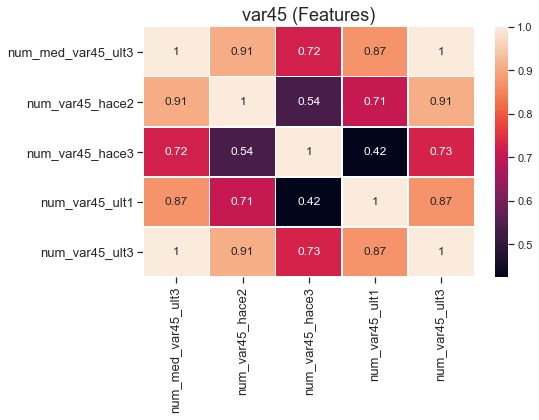

In [79]:
# Analisando a correlação entre as features numéricas de "var45":
ptlib.plot_corr_features(df=train_df, features=feat_groupby_vars['var45'], digits=3, title="var45 (Features)",
                         title_fontsize=18, xtick_labelsize=13, ytick_labelsize=13, width=8, height=6,
                         figure_id='plot_corr_features_var45', figure_path=PROJECT_IMG_PATH,
                         figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                        )

**Análise:** observando a **correlação entre as features** (**plot acima**) concluímos que:
1. **`num_med_var45_ult3 x num_var45_hace2`** possuem uma alta correlação positiva (`correlação = 0.91`);
2. **`num_med_var45_ult3 x num_var45_hace3`** possuem uma alta correlação positiva (`correlação = 0.72`);
3. **`num_med_var45_ult3 x num_var45_ult1`** possuem uma alta correlação positiva (`correlação = 0.87`);
4. **`num_med_var45_ult3 x num_var45_ult3`** são **colineares**, pois representam a mesma informação (`correlação = 1.00`);
5. **`num_var45_hace2 x num_var45_hace3`** possuem uma média correlação positiva (`correlação = 0.54`);
6. **`num_var45_hace2 x num_var45_ult1`** possuem uma alta correlação positiva (`correlação = 0.71`);
7. **`num_var45_hace2 x num_var45_ult3`** possuem uma alta correlação positiva (`correlação = 0.91`);
8. **`num_var45_hace3 x num_var45_ult1`** possuem uma pequena correlação positiva (`correlação = 0.42`);
9. **`num_var45_hace3 x num_var45_ult3`** possuem uma alta correlação positiva (`correlação = 0.73`);
10. **`num_var45_ult1 x num_var45_ult3`** possuem uma alta correlação positiva (`correlação = 0.87`).

Vamos analisar as suas distribuições de frequências (*Histograma*) e também verificar se existem **outliers** com os gráficos de *BoxPlot*.

Saving figure: plot_histograms_var45


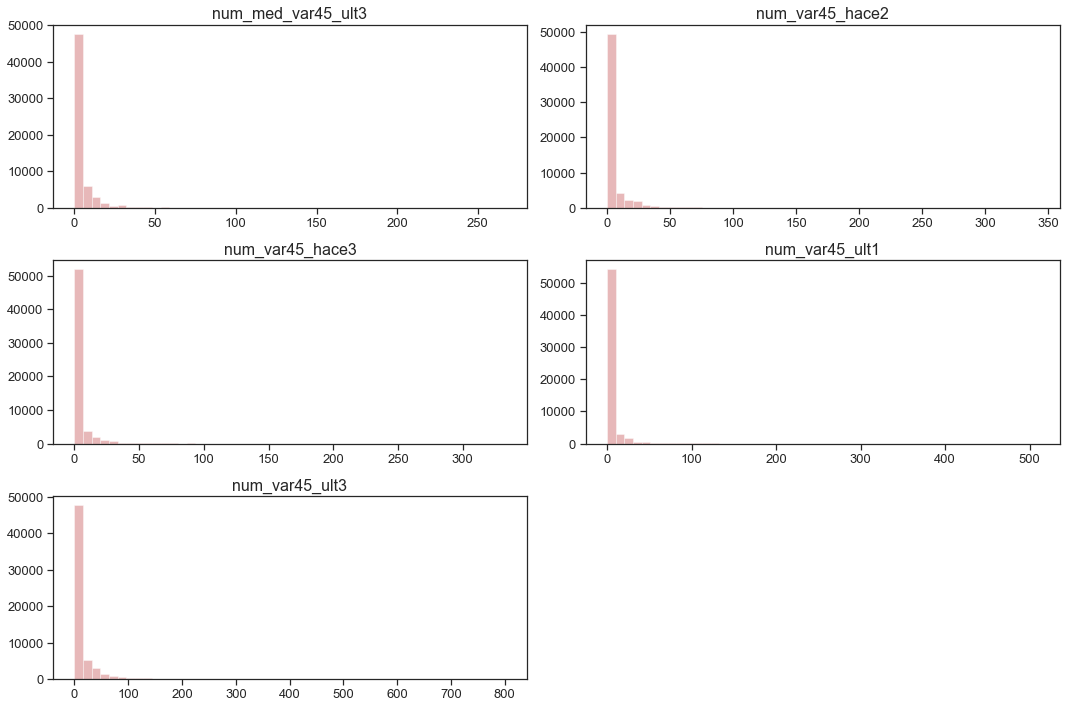

In [80]:
# Desenhando os histogramas para as features de "var45":
ptlib.plot_histograms_features(df=train_df, features=feat_groupby_vars['var45'], plot_style='ticks', kde=False, colors='r',
                               titles=feat_groupby_vars['var45'], titles_fontsize=16, xlabels=None, xlabels_fontsize=13,
                               ylabels=None, ylabels_fontsize=13, xtick_labelsize=13, ytick_labelsize=13,
                               cols_nr=2, rows_nr=3, width=15, height=10, wspace=None, hspace=None,
                               figure_id="plot_histograms_var45", figure_path=PROJECT_IMG_PATH,
                               figure_file_format="png", figure_file_extension=".png",
                               tight_layout=True, dpi=300
                              )

Saving figure: plot_boxplots_var45


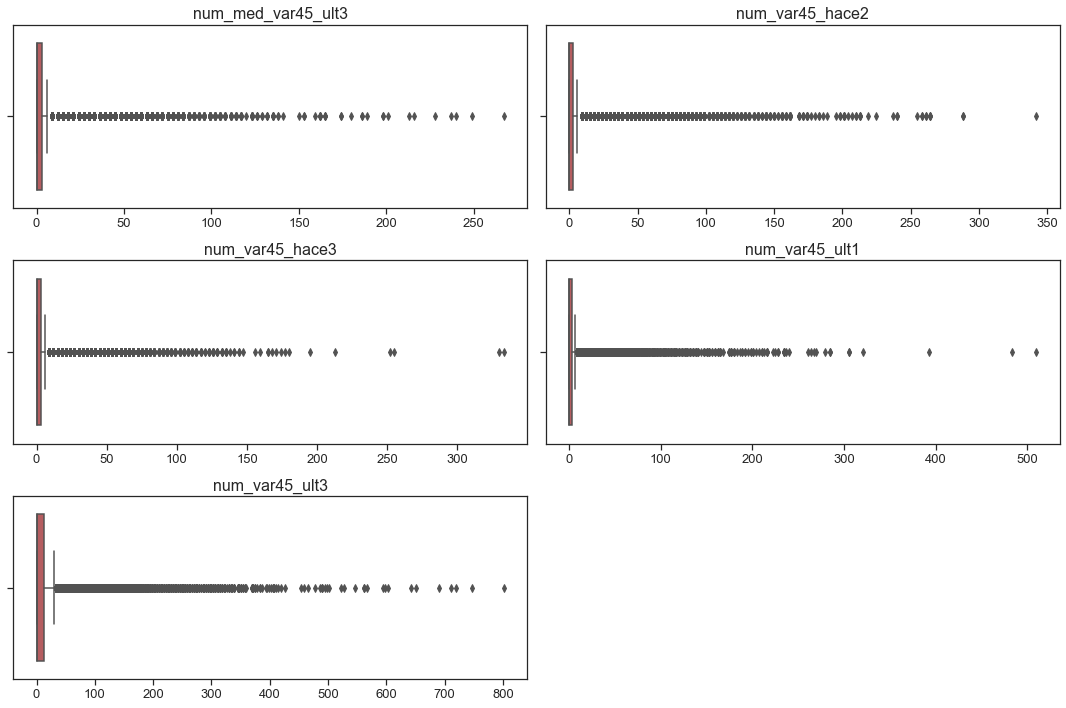

In [81]:
# Desenhando os boxplots para as features de "var45":
ptlib.plot_boxplots_features(df=train_df, features=feat_groupby_vars['var45'], plot_style='ticks', colors='r',
                             orient='h', saturation=0.75,
                             titles=feat_groupby_vars['var45'], titles_fontsize=16, xlabels=None, xlabels_fontsize=13,
                             ylabels=None, ylabels_fontsize=13, xtick_labelsize=13, ytick_labelsize=13,
                             cols_nr=2, rows_nr=3, width=15, height=10, wspace=None, hspace=None,
                             figure_id="plot_boxplots_var45", figure_path=PROJECT_IMG_PATH,
                             figure_file_format="png", figure_file_extension=".png",
                             tight_layout=True, dpi=300
                            )

**Análise:** Temos uma alta variabilidade nos dados ocasionada pelos **outliers** (*Box Plot*). Também podemos observar que as distribuições de frequência em todas as features estão concentradas em valores iguais a **`0`** (**`50%`** dos valores na feature **`num_var45_ult3`**, e acima de **`60%`** dos valores nas outras features), conforme podemos observar no *histograma* e no relatório de *percentis*.

**Conclusão:** para as **features** de **var45**, embora a grande maioria dos valores são constantes e iguais a **`0`**, entendemos que estas **features são `relevantes` e deverão ser analisadas** na criação dos modelos preditivos, exceto a feature `num_med_var45_ult3` que possui a mesma informação da feature `num_var45_ult3`, pois são **colineares** (`correlação = 1.0`).

In [82]:
# Armazenando informações sobre as features:
santander_feat_info.save(key='Discrete', features=feat_groupby_vars['var45']) # Quantitativa Discreta.

features = ['num_var45_hace2', 'num_var45_hace3', 'num_var45_ult1', 'num_var45_ult3']
santander_feat_info.save(key='Outliers', features=feat_groupby_vars['var45']) # Variáveis têm "Outliers".

santander_feat_info.save(key='Irrelevant', features=['num_med_var45_ult3']) # Irrelevante.

## var46

In [83]:
# Resumo das informações:
train_df[feat_groupby_vars['var46']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60816 entries, 0 to 60815
Data columns (total 5 columns):
ind_var46      60816 non-null int64
ind_var46_0    60816 non-null int64
num_var46      60816 non-null int64
num_var46_0    60816 non-null int64
saldo_var46    60816 non-null int64
dtypes: int64(5)
memory usage: 2.3 MB


In [84]:
# Dataframe "train_df":
train_df[feat_groupby_vars['var46']].describe()

,ind_var46,ind_var46_0,num_var46,num_var46_0,saldo_var46
count,60816.0,60816.0,60816.0,60816.0,60816.0
mean,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0


In [85]:
# Obtendo os percentis a partir de "80%", com intervá-los de "5%":
result = dslib.get_features_percentiles(data=train_df, features=feat_groupby_vars['var46'], percent_range=range(80, 105, 5))
result

,ind_var46,ind_var46_0,num_var46,num_var46_0,saldo_var46
Percentile,,,,,
80%,0.0,0.0,0.0,0.0,0.0
85%,0.0,0.0,0.0,0.0,0.0
90%,0.0,0.0,0.0,0.0,0.0
95%,0.0,0.0,0.0,0.0,0.0
100%,0.0,0.0,0.0,0.0,0.0


In [86]:
# Vamos verificar a proporção dos valores para as variáveis relacionadas a "var46":
for feat in feat_groupby_vars['var46']:
    print(dslib.percent_count_feature(df=train_df, feature=feat, lines_drop=False))
    print()

           Total  Percent
ind_var46                
0          60816      1.0

             Total  Percent
ind_var46_0                
0            60816      1.0

           Total  Percent
num_var46                
0          60816      1.0

             Total  Percent
num_var46_0                
0            60816      1.0

             Total  Percent
saldo_var46                
0            60816      1.0



**Análise:** observamos que as **`features`** **`ind_var46`** e **`ind_var46_0`**, relacionadas com **`var46`**, são variáveis do tipo `Categóricas Nominais Binárias`, com apenas duas classes **`0`** e **`1`**. Entretanto, as **`features`** **`num_var46`** e **`num_var46_0`**, relacionadas com **`var46`**, são variáveis do tipo `Quantitativa Discreta`. A feature **`saldo_var46`** é uma variável do tipo `Quantitativa Contínua`.

Observamos, também, que nas features **`ind_var46`** e **`ind_var46_0`**, **`100%`** das observações estão concentradas na classe **`0`**. As features **`num_var46`**, **`num_var46_0`**, e **`saldo_var46`**, possuem em **`100%`** das observações, valores iguais a **`0`**.

**Conclusão:** Portanto, entendemos que estas **features são `irrelevantes`** para serem analisadas na criação dos modelos preditivos.

In [87]:
# Armazenando informações sobre as features:
features = ['ind_var46', 'ind_var46_0']
santander_feat_info.save(key='Binary', features=features) # Categórica Nominal Binária.

features = ['num_var46', 'num_var46_0']
santander_feat_info.save(key='Discrete', features=features) # Quantitativa Discreta.

features = ['saldo_var46']
santander_feat_info.save(key='Continuous', features=features) # Quantitativa Contínua.

santander_feat_info.save(key='Irrelevant', features=feat_groupby_vars['var46']) # Irrelevantes.

In [88]:
# Verificando a contagem de features analisadas até aqui:
print("Counting of analyzed features: {}".format(santander_feat_info.count(keys=['Categorical', 'Binary', 'Ordinal',
                                                                                 'Discrete', 'Continuous'])))

Counting of analyzed features: 90


## 04- Salvando informações (`objetos`) importantes, encontradas nesta etapa:

Agora, vamos salvar os seguintes `objetos` importantes, que serão utilizados nas próximas etapas, saber:

1. **`feat_groupby_vars`:** dicionário com as features agrupadas por tipo de variável (var1, var2, var18, etc...);

2. **`vars_groupby_featcount`:** dicionário com as variáveis (var1, var2, var18, etc...) agrupadas por quantidade (contagem) de features (Feat_1, Feat_2, Feat_3, etc...);

3. **`santander_feat_info`:** dicionário com as principais informações sobre cada uma das features, ou seja, `tipo de variável`, valores ausentes (`NaN`), valores extremos (`Outliers`) e uma lista das variáveis que não são importantes para a criação dos modelos preditivos (`Drop`).

In [89]:
# Salvando o objeto "feat_groupby_vars":
dslib.pickle_object_save (path=PROJECT_OBJ_PATH, file="feat_groupby_vars.pickle", object_name=feat_groupby_vars,
                          msg="The 'feat_groupby_vars' object has been successfully saved!")

# Salvando o objeto "vars_groupby_featcount":
dslib.pickle_object_save (path=PROJECT_OBJ_PATH, file="vars_groupby_featcount.pickle", object_name=vars_groupby_featcount,
                          msg="The 'vars_groupby_featcount' object has been successfully saved!")

# Salvando o objeto "santander_feat_info":
dslib.pickle_object_save (path=PROJECT_OBJ_PATH, file="santander_feat_info.pickle", object_name=santander_feat_info,
                          msg="The 'santander_feat_info' object has been successfully saved!")

The 'feat_groupby_vars' object has been successfully saved!
The 'vars_groupby_featcount' object has been successfully saved!
The 'santander_feat_info' object has been successfully saved!


## <font color='black'>FIM</font>